In [24]:
"""Convolution, Padding, Stride: CNN Architecture LeNET
We have input data, we give them to convolution layer and with kernel, make feature map
Then, pooling layer, then we get tensor. Repeat same as many times you want.
Then, flatten the data, pass it through fully connected layer, binary classification: sigmoid or multiclass: softmax
Parameters in it to make different architectures from this basic model:
Number of Convolution Layers, Number and type of filters, Strides, Padding, FC Nodes and Layer, Activation Function, Dropout, Batch Normalization.
LeNET, AlexNET, GoogLeNET, VggNET, ResNET, Inception.

LeNET:
Image: 32*32
Layer 1:
Filters: 6 (5,5)
Average Pooling Layer (2*2)
Stride = 2

Layer 2:
Filter: 16 (5*5)
Average Pooling Layer: (2*2)
Stride = 2

Flatten: 1-D tensor
Layer 3:
FC Layer: 120 neurons

Layer 4:
84 neurons

Layer 5:
Softmax Activation Function, 10 outputs as because of 10 digits.
That's why LeNET-5.
And best activation function in 1998 was tanh so that was used.
"""

"Convolution, Padding, Stride: CNN Architecture LeNET\nWe have input data, we give them to convolution layer and with kernel, make feature map\nThen, pooling layer, then we get tensor. Repeat same as many times you want.\nThen, flatten the data, pass it through fully connected layer, binary classification: sigmoid or multiclass: softmax\nParameters in it to make different architectures from this basic model:\nNumber of Convolution Layers, Number and type of filters, Strides, Padding, FC Nodes and Layer, Activation Function, Dropout, Batch Normalization.\nLeNET, AlexNET, GoogLeNET, VggNET, ResNET, Inception.\n\nLeNET:\nImage: 32*32\nLayer 1:\nFilters: 6 (5,5)\nAverage Pooling Layer (2*2)\nStride = 2\n\nLayer 2:\nFilter: 16 (5*5)\nAverage Pooling Layer: (2*2)\nStride = 2\n\nFlatten: 1-D tensor\nLayer 3:\nFC Layer: 120 neurons\n\nLayer 4:\n84 neurons\n\nLayer 5:\nSoftmax Activation Function, 10 outputs as because of 10 digits.\nThat's why LeNET-5.\nAnd best activation function in 1998 was

In [25]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # Reshape and normalize
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255   # Reshape and normalize


In [28]:
model = Sequential()

# First Convolution and Pooling Layer
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Convolution and Pooling Layer
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the output for Fully Connected Layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))

# Output Layer (10 classes)
model.add(Dense(10, activation='softmax'))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\q\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8798 - loss: 0.4161 - val_accuracy: 0.9666 - val_loss: 0.1084
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.0967 - val_accuracy: 0.9742 - val_loss: 0.0811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9808 - loss: 0.0614 - val_accuracy: 0.9826 - val_loss: 0.0557
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9801 - val_loss: 0.0611
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9828 - val_loss: 0.0565
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9859 - val_loss: 0.0437
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0

In [29]:
y_prob = model.predict(X_test)
#The predicted result is in format of 10*n array, where each 10-membered array contains probability, of digit to be the corresponding digit.
#So, digit with max_probability is the predicted digit.
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9864

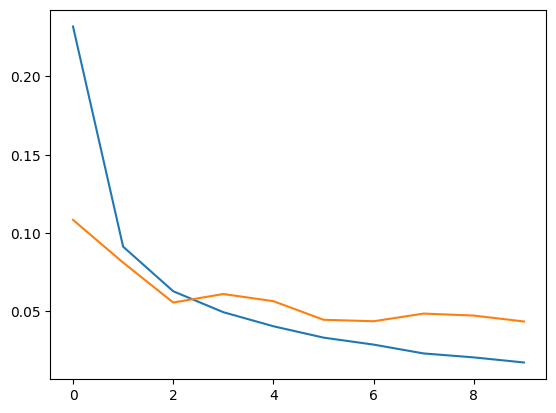

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

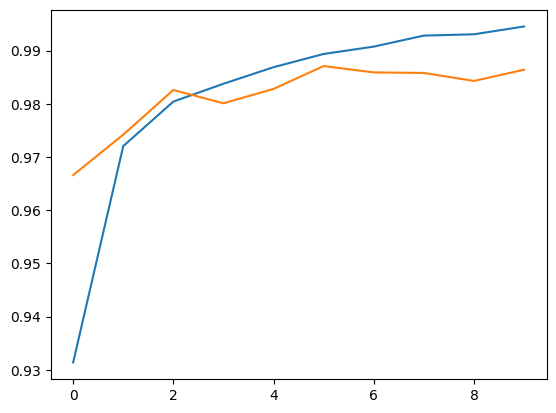

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [39]:
"""CNN vs ANN:
1. CNN's Computation Cost doesn't depend on image size much, as the learning parameters depends upon the filters we have implemented.
2. But, see there also like ANN, we are calculating learning parameters by Back-Propagation, but here just the data is kept so as to not loose the spatial information.
"""

"CNN vs ANN:\n1. CNN's Computation Cost doesn't depend on image size much, as the learning parameters depends upon the filters we have implemented.\n2. But, see there also like ANN, we are calculating learning parameters by Back-Propagation, but here just the data is kept so as to not loose the spatial information.\n"